## Statistical Modeling on Georgia Bulldawgs Wins
My Spring 2017 study to determine the impact of a UGA Home/Away game on a win.
The game data are from 2012 to 2016 and can be accessed [here](http://www.cfbstats.com/2016/team/257/index.html).

Retrieving game data from year 2012
Retrieving game data from year 2013
Retrieving game data from year 2014
Retrieving game data from year 2015
Retrieving game data from year 2016
[[27  7 14]
 [ 6  5  7]]
df= 2
critical value= 5.99146454711
p-value= 0.221201648782
Fail to reject the null hypothesis because pval > alpha


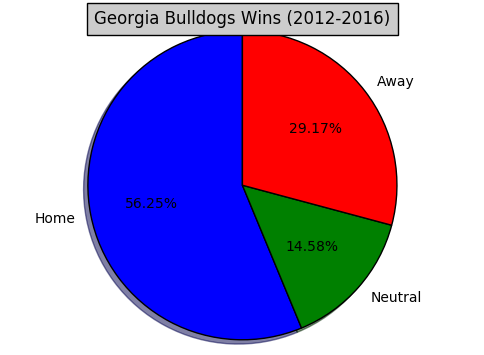

In [1]:
import bs4 as bs
import urllib2
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


def results_by_sites(startYear, endYear):
    years = range(startYear,endYear+1)

    # error catch
    if not years or endYear > 2016:
        print 'Invalid year range selected'
        return None

    locations = []
    results = []
    # url request for each year
    for year in years:
        # request website
        url = ('http://www.cfbstats.com/'+str(year)+'/team/257/index.html')
        # get source
        print 'Retrieving game data from year ' + str(year)
        source = urllib2.urlopen(url)

        # create bs object
        soup = bs.BeautifulSoup(source, "lxml", from_encoding="utf-8")

        # find team schedule table
        table = soup.find('table', {'class': 'team-schedule'})

        # find all opponent name table rows
        td = table.findAll('td', {'class': 'opponent'})

        # extract and store table row text from html
        opponents = [str(temp.text) for temp in td]

        # create list for Away, Neutral, or Home games based on opponent name
        for opponent in opponents:
            if '@' in opponent:
                locations.append('Away')
            elif '+' in opponent:
                locations.append('Neutral')
            else:
                locations.append('Home')
        # find all result outcome table rows
        td = table.findAll('td', {'class': 'result'})
        results_raw = [str(temp.text) for temp in td]
        # create list for win/loss based on occurrence of W
        for result in results_raw:
            if 'W' in result:
                results.append(True)
            else:
                results.append(False)

    # creating result,location tuple
    chart = zip(results, locations)
    # counts of each possibility
    ctable = np.array([[chart.count((True,'Home')), chart.count((True,'Neutral')), chart.count((True,'Away'))],
                      [chart.count((False,'Home')), chart.count((False,'Neutral')), chart.count((False,'Away'))]])

    print ctable

    I, J = ctable.shape
    # degrees of freedom rows-1 * columns-1
    df = (I - 1) * (J - 1)

    # marginals
    row_sum = np.sum(ctable, axis=1)
    col_sum = np.sum(ctable, axis=0)
    N = np.sum(row_sum)
    # assertion for error catching. These variables must be equal.
    assert np.sum(col_sum) == N
    # declare chi statistic
    chi = 0
    # Null hypothesis iterate through every index
    for i in range(I):
        for j in range(J):
            # expected value calculation
            expected = (1.0 * row_sum[i] * col_sum[j]) / N
            # chi square statistic formula
            chi += ((ctable[i, j] - expected) ** 2) / expected


    # critical value with alpha = 0.05 and df = 2
    cval = stats.chi2.ppf(1.0 - 0.05, df)
    pval = 1.0 - stats.chi2.cdf(chi, df)

    # decision based on pval
    decision = ''
    if pval < 0.05:
        decision += 'Reject the null hypothesis because pval < alpha'
    else:
        decision += 'Fail to reject the null hypothesis because pval > alpha'

    #print 'chi-statistic=', chi
    print 'df=', df
    print 'critical value=', cval
    print 'p-value=', pval
    print decision


    return [ctable, pval]

startYear = 2012
endYear = 2016
# get game statistics [ctvalue, pval]
game_stats = results_by_sites(startYear,endYear)
ctable = game_stats[0]

# pie chart of home, neutral and away game wins:
labels = ['Home', 'Neutral', 'Away']
counts = [ctable[0][0], ctable[0][1], ctable[0][2]]
# chart configurations
plt.pie(counts, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
plt.title('Georgia Bulldogs Wins ('+str(startYear)+'-'+str(endYear)+')', bbox={'facecolor':'0.8', 'pad':5})
plt.axis('equal')
plt.show()